<a href="https://colab.research.google.com/github/Caesarblack27/rain-prediction/blob/main/Rain_Prediction_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style='background:#C2C4E2; border:0; color:black'><center>RAIN PREDICTION</center></h1>


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#C2C4E2; border:0; color:black'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)    

[3. DATA VISUALIZATION AND CLEANINGS](#3)     

[4. DATA PREPROCESSING](#4)     

[5. MODEL BUILDING](#5)

[6. CONCLUSION](#6)

[7. END](#7)
    
 <a id="1"></a>
<h1 style='background:#C2C4E2; border:0; color:black'><center>LIBRARIES</center></h1>

# IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(0)

<a id="2"></a>
<h1 style='background:#C2C4E2; border:0; color:black'><center>LOADING DATA</center></h1>

# LOADING DATA

In [ ]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54245 entries, 0 to 54244
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           54245 non-null  object 
 1   Location       54245 non-null  object 
 2   MinTemp        53629 non-null  float64
 3   MaxTemp        53801 non-null  float64
 4   Rainfall       52816 non-null  float64
 5   Evaporation    24047 non-null  float64
 6   Sunshine       18441 non-null  float64
 7   WindGustDir    48398 non-null  object 
 8   WindGustSpeed  48405 non-null  float64
 9   WindDir9am     48002 non-null  object 
 10  WindDir3pm     51568 non-null  object 
 11  WindSpeed9am   52892 non-null  float64
 12  WindSpeed3pm   52271 non-null  float64
 13  Humidity9am    53020 non-null  float64
 14  Humidity3pm    52539 non-null  float64
 15  Pressure9am    45067 non-null  float64
 16  Pressure3pm    45117 non-null  float64
 17  Cloud9am       29614 non-null  float64
 18  Cloud3

**Points to notice:**

* There are missing values in the dataset
* Dataset includes numeric and categorical values

<a id="3"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA VISUALIZATION AND CLEANING</center></h2>

# DATA VISUALIZATION AND CLEANING

**Steps involves in this section:**

* Count plot of target column
* Correlation amongst numeric attributes
* Parse Dates into datetime
* Encoding days and months as continuous cyclic features


<ipython-input-9-9f925fcff129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

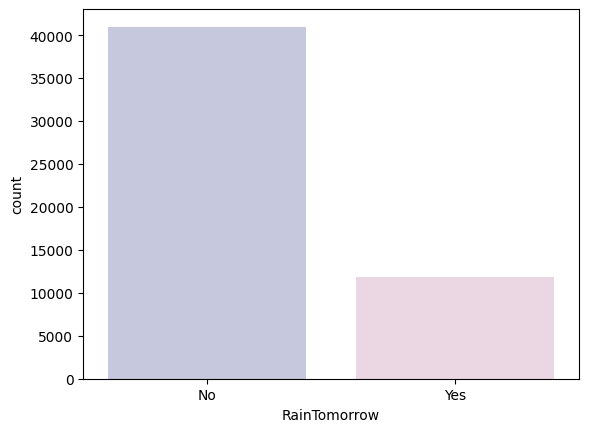

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

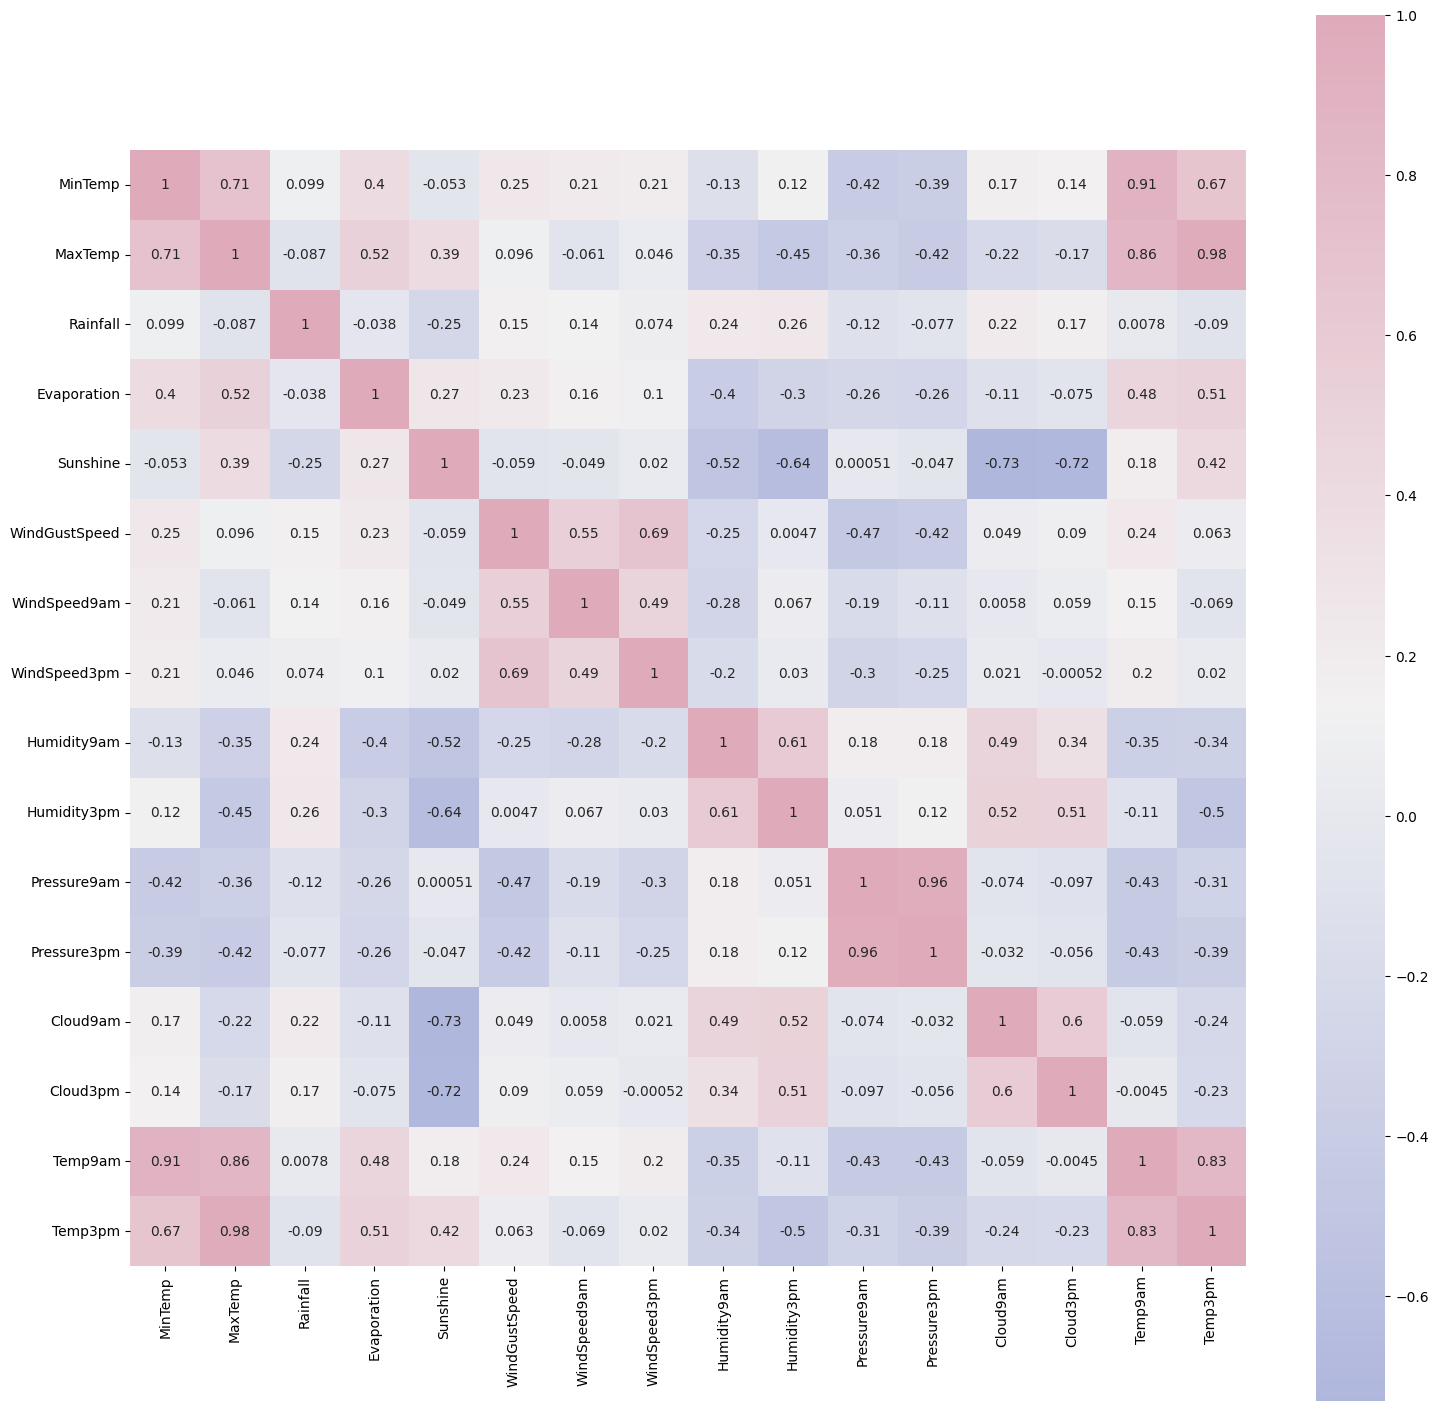

In [ ]:
# Correlation amongst numeric attributes
numeric_data = data.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)
plt.show()

In [ ]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

Date
10    54245
Name: count, dtype: int64

In [ ]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters.
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

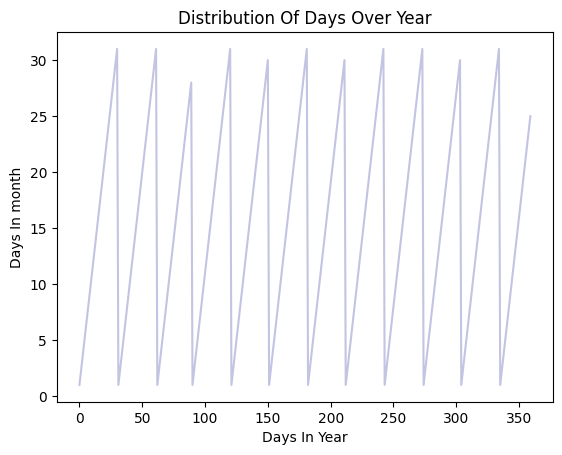

In [ ]:
# roughly a year's span section
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature. This can be used as input features to ANN.

Text(0.5, 0, 'Sine Encoded Months')

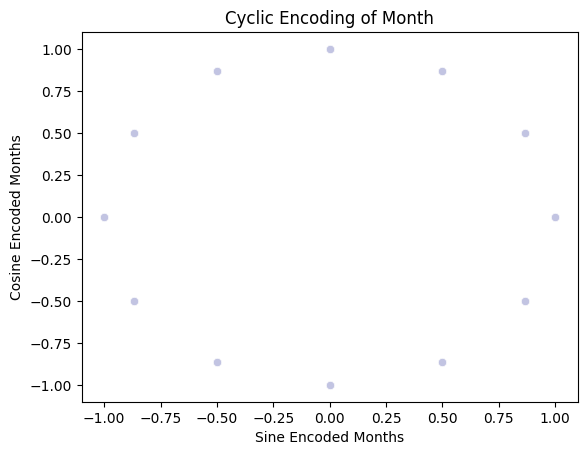

In [ ]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")


Text(0.5, 0, 'Sine Encoded Day')

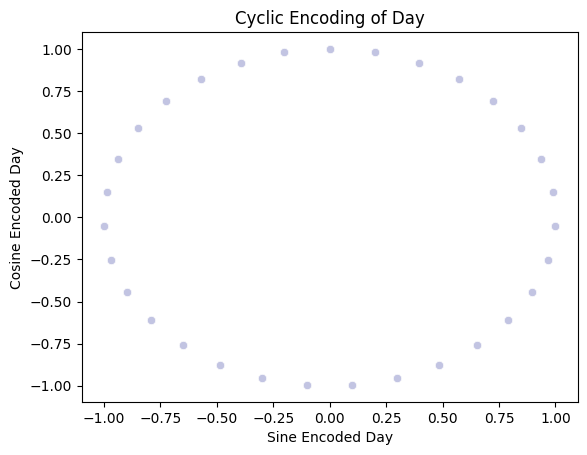

In [ ]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

Next, I will deal with missing values in categorical and numeric attributes separately

**Categorical variables**

* Filling missing values with mode of the column value

In [ ]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 5847
WindDir9am 6243
WindDir3pm 2677
RainToday 1429
RainTomorrow 1428


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

**Numerical variables**

* Filling missing values with median of the column value

In [ ]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 616
MaxTemp 444
Rainfall 1429
Evaporation 30198
Sunshine 35804
WindGustSpeed 5840
WindSpeed9am 1353
WindSpeed3pm 1974
Humidity9am 1225
Humidity3pm 1706
Pressure9am 9178
Pressure3pm 9128
Cloud9am 24631
Cloud3pm 25069
Temp9am 929
Temp3pm 1452
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [ ]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54245 entries, 0 to 54244
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54245 non-null  datetime64[ns]
 1   Location       54245 non-null  object        
 2   MinTemp        54245 non-null  float64       
 3   MaxTemp        54245 non-null  float64       
 4   Rainfall       54245 non-null  float64       
 5   Evaporation    54245 non-null  float64       
 6   Sunshine       54245 non-null  float64       
 7   WindGustDir    54245 non-null  object        
 8   WindGustSpeed  54245 non-null  float64       
 9   WindDir9am     54245 non-null  object        
 10  WindDir3pm     54245 non-null  object        
 11  WindSpeed9am   54245 non-null  float64       
 12  WindSpeed3pm   54245 non-null  float64       
 13  Humidity9am    54245 non-null  float64       
 14  Humidity3pm    54245 non-null  float64       
 15  Pressure9am    5424

Text(0.5, 0, 'Years')

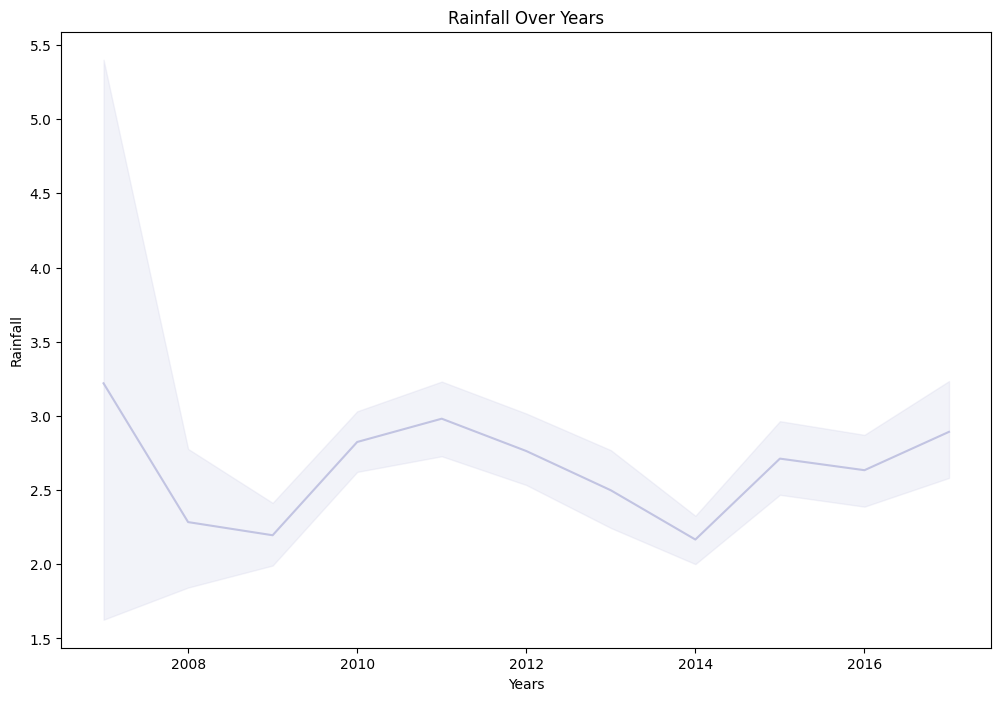

In [ ]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

<ipython-input-23-98c985829d42>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
<ipython-input-23-98c985829d42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
<ipython-input-23-98c985829d42>:4: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)


Text(0.5, 0, 'Year')

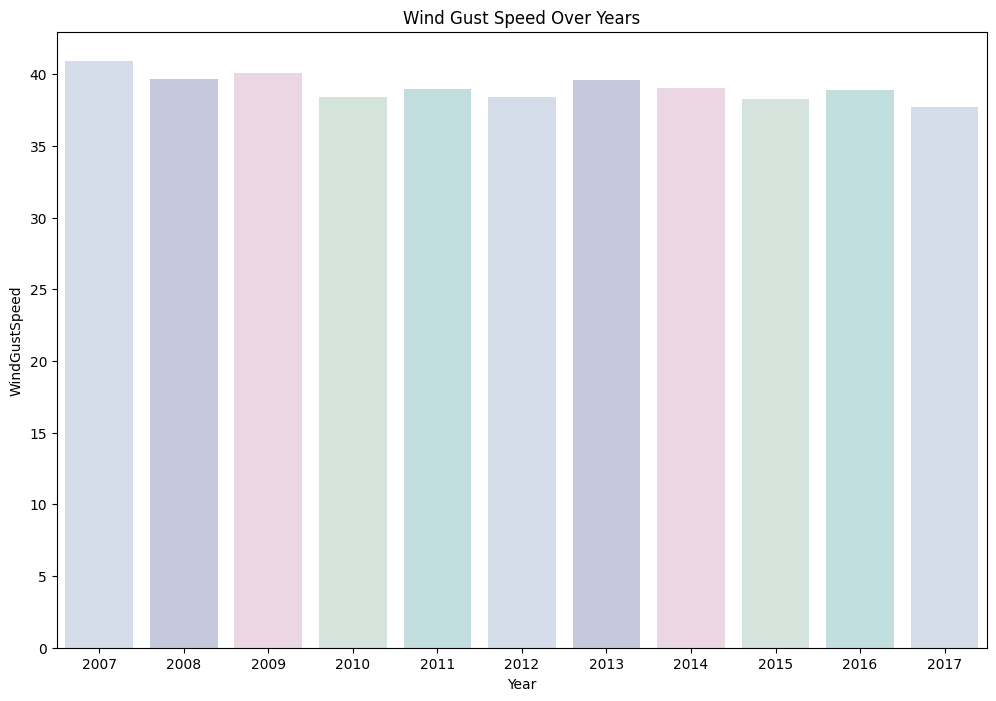

In [ ]:
#Evauating Wind gust speed over years
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

<a id="4"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA PREPROCESSING</center></h2>

# DATA PREPROCESSING

**Steps involved in Data Preprocessing:**

* Label encoding columns with categorical data
* Perform the scaling of the features
* Detecting outliers
* Dropping the outliers based on data analysis

**Label encoding the catagorical varable**

In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54245 entries, 0 to 54244
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54245 non-null  datetime64[ns]
 1   Location       54245 non-null  int64         
 2   MinTemp        54245 non-null  float64       
 3   MaxTemp        54245 non-null  float64       
 4   Rainfall       54245 non-null  float64       
 5   Evaporation    54245 non-null  float64       
 6   Sunshine       54245 non-null  float64       
 7   WindGustDir    54245 non-null  int64         
 8   WindGustSpeed  54245 non-null  float64       
 9   WindDir9am     54245 non-null  int64         
 10  WindDir3pm     54245 non-null  int64         
 11  WindSpeed9am   54245 non-null  float64       
 12  WindSpeed3pm   54245 non-null  float64       
 13  Humidity9am    54245 non-null  float64       
 14  Humidity3pm    54245 non-null  float64       
 15  Pressure9am    5424

In [ ]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,54245.0,3.353285e-17,1.000009,-1.630580,-0.919338,0.147526,0.858769,1.570011
MinTemp,54245.0,-1.676642e-16,1.000009,-3.252610,-0.678992,0.094672,0.789391,2.778814
MaxTemp,54245.0,2.682628e-16,1.000009,-4.088096,-0.651838,-0.046330,0.619729,3.692682
Rainfall,54245.0,2.279186e-17,1.000009,-0.284542,-0.284542,-0.284542,-0.218962,40.266327
Evaporation,54245.0,2.221551e-16,1.000009,-1.659126,-0.136300,-0.136300,-0.136300,46.342994
Sunshine,54245.0,1.529936e-15,1.000009,-3.637285,0.154583,0.154583,0.154583,2.579615
WindGustDir,54245.0,-8.173632e-17,1.000009,-1.728772,-0.890879,0.156488,0.994381,1.413328
WindGustSpeed,54245.0,-2.389216e-16,1.000009,-2.396993,-0.668991,-0.143077,0.533098,7.219715
WindDir9am,54245.0,-7.964052e-17,1.000009,-1.779899,-0.857080,-0.164966,0.988558,1.680672
WindDir3pm,54245.0,-1.676642e-17,1.000009,-1.593061,-0.715273,-0.056932,0.820856,1.698644


<ipython-input-26-6d42aad80754>:5: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


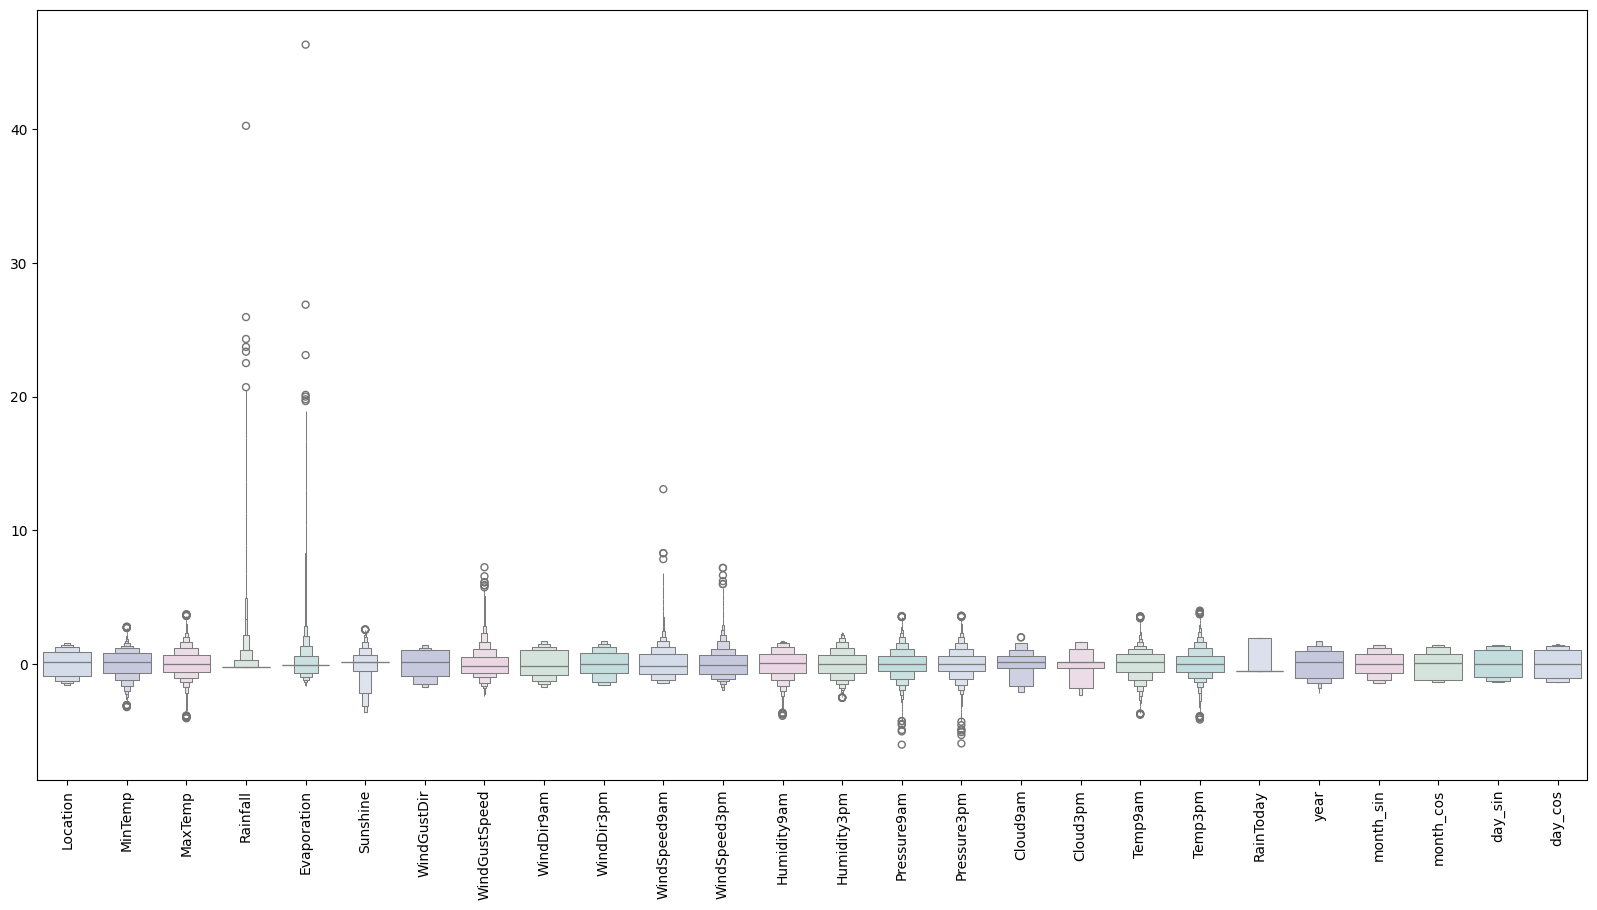

In [ ]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#full data for
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(46078, 27)

<ipython-input-28-0b9d7aa52ee8>:4: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


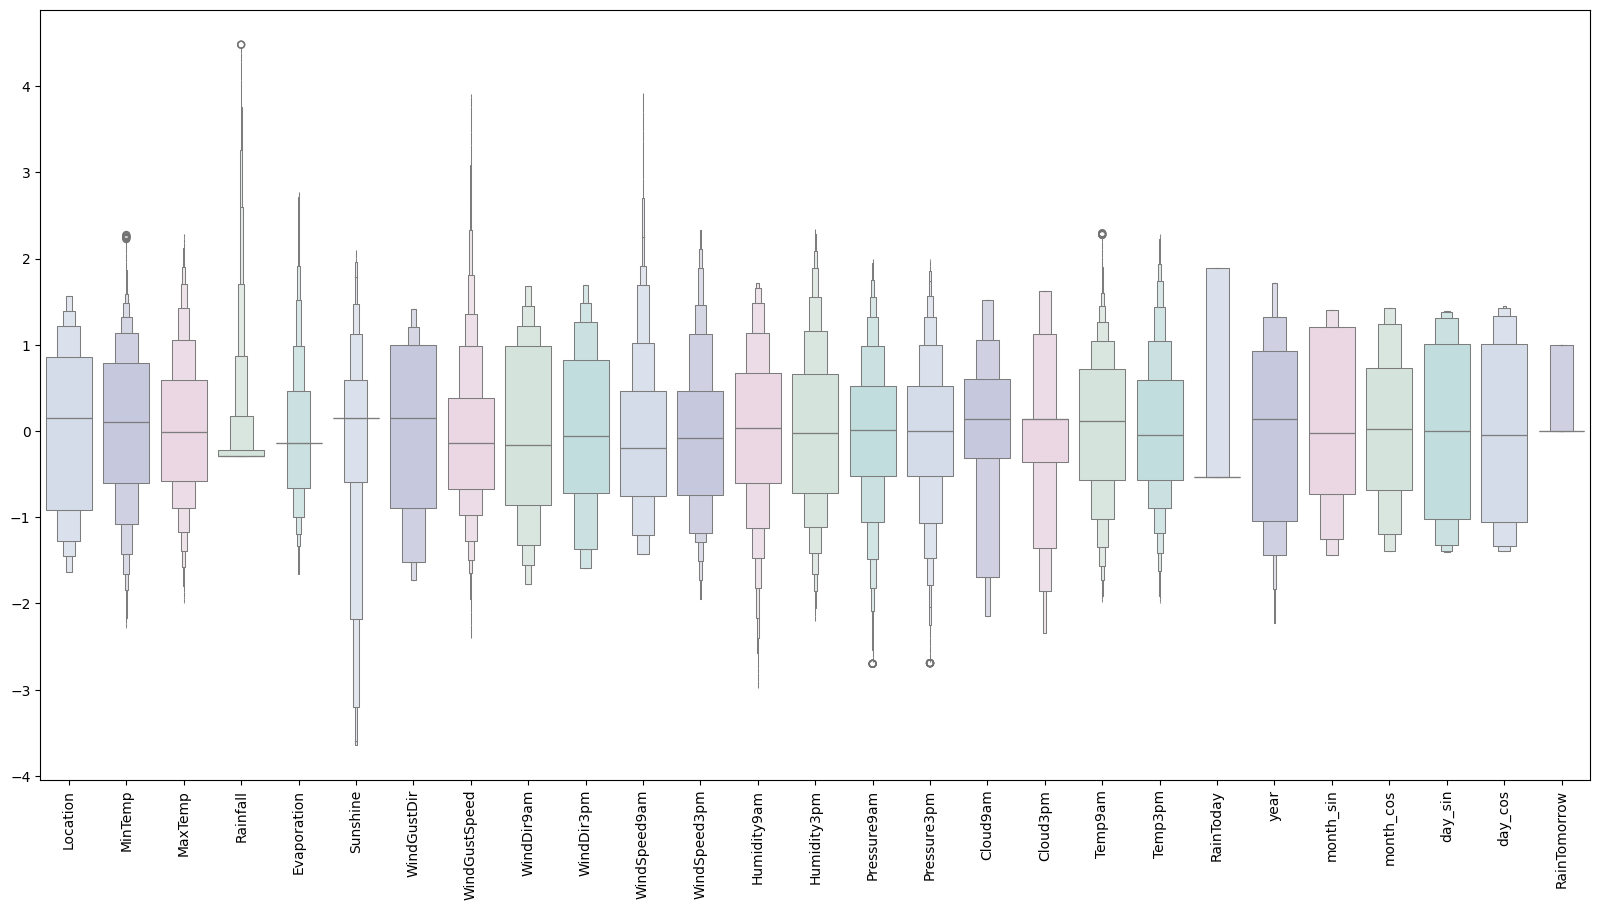

In [ ]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Looks Good. Up next is building artificial neural network.

<a id="5"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>MODEL BUILDING</center></h2>

# MODEL BUILDING


**In this project, we build an artificial neural network.**

**Following steps are involved in the model building**

* Assining X and y the status of attributes and tags
* Splitting test and training sets
* Initialising the neural network
* Defining by adding layers
* Compiling the neural network
* Train the neural network

In [ ]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(46078, 26)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
922/922 [==============================] - 4s 3ms/step - loss: 0.5886 - accuracy: 0.7848 - val_loss: 0.4312 - val_accuracy: 0.7784
Epoch 2/150
922/922 [==============================] - 2s 3ms/step - loss: 0.4453 - accuracy: 0.7853 - val_loss: 0.4198 - val_accuracy: 0.7784
Epoch 3/150
922/922 [==============================] - 4s 4ms/step - loss: 0.4352 - accuracy: 0.7853 - val_loss: 0.4128 - val_accuracy: 0.7784
Epoch 4/150
922/922 [==============================] - 3s 3ms/step - loss: 0.4281 - accuracy: 0.7853 - val_loss: 0.4084 - val_accuracy: 0.7784
Epoch 5/150
922/922 [==============================] - 3s 3ms/step - loss: 0.4227 - accuracy: 0.7853 - val_loss: 0.4054 - val_accuracy: 0.7784
Epoch 6/150
922/922 [==============================] - 3s 3ms/step - loss: 0.4219 - accuracy: 0.7980 - val_loss: 0.4025 - val_accuracy: 0.7784
Epoch 7/150
922/922 [==============================] - 3s 3ms/step - loss: 0.4195 - accuracy: 0.8125 - val_loss: 0.4000 - val_accuracy: 0.8269

Plotting training and validation loss over epochs

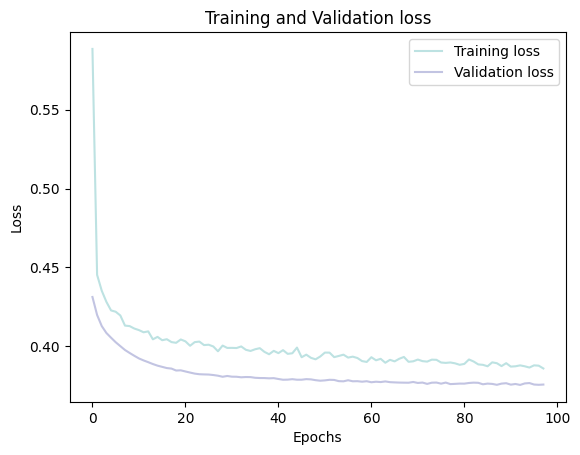

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

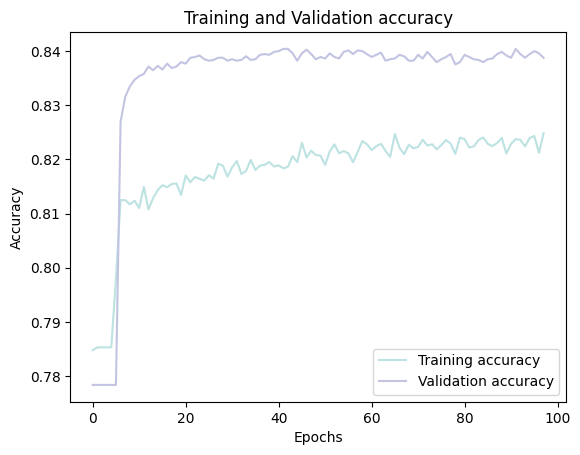

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="6"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>CONCLUSION</center></h2>

# CONCLUSIONS


**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

288/288 [==============================] - 1s 1ms/step


<Axes: >

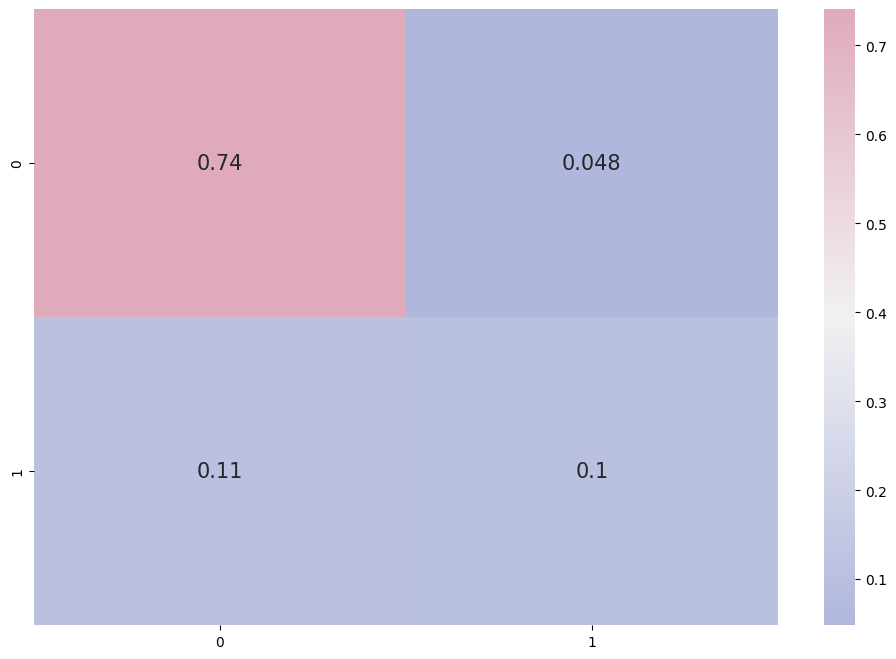

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7271
           1       0.68      0.50      0.58      1945

    accuracy                           0.85      9216
   macro avg       0.78      0.72      0.74      9216
weighted avg       0.83      0.85      0.84      9216



In [ ]:
# Memisahkan fitur dan target
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun model SVM
svm_model = SVC(kernel='rbf', probability=True)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Memprediksi hasil dari test set
svm_y_pred = svm_model.predict(X_test)
svm_y_prob = svm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluasi model SVM
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print("Support Vector Machine Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")

# Evaluasi model ANN
ann_y_pred = model.predict(X_test)
ann_y_pred = (ann_y_pred > 0.5).astype(int)

ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_f1 = f1_score(y_test, ann_y_pred)

print("\nArtificial Neural Network Metrics:")
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"Precision: {ann_precision:.4f}")
print(f"Recall: {ann_recall:.4f}")
print(f"F1 Score: {ann_f1:.4f}")

Support Vector Machine Metrics:
Accuracy: 0.8519
Precision: 0.7622
Recall: 0.4334
F1 Score: 0.5526

Artificial Neural Network Metrics:
Accuracy: 0.8519
Precision: 0.7622
Recall: 0.4334
F1 Score: 0.5526
